In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.shape

(39644, 61)

In [5]:
data.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [6]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
data.drop(columns = ['url'] ,inplace=True)
data.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


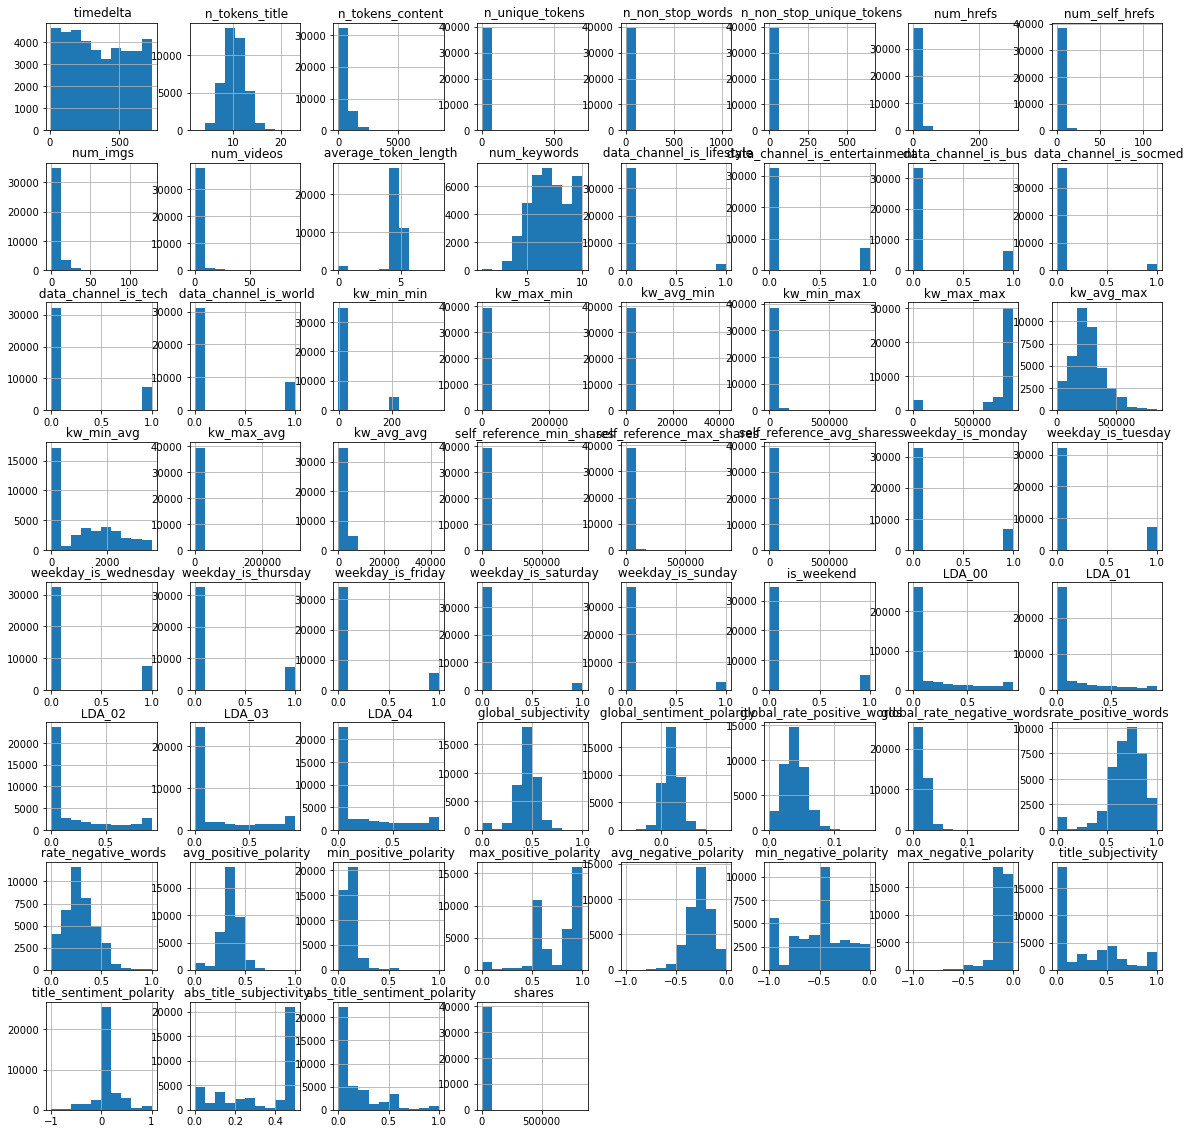

In [8]:
data.hist(figsize=(20,20))
plt.show()

# chck correlation

/var/folders/nb/s2fx_kf54nv8fpngr1jppkjh0000gn/T/ipykernel_8342/2963683346.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot:>

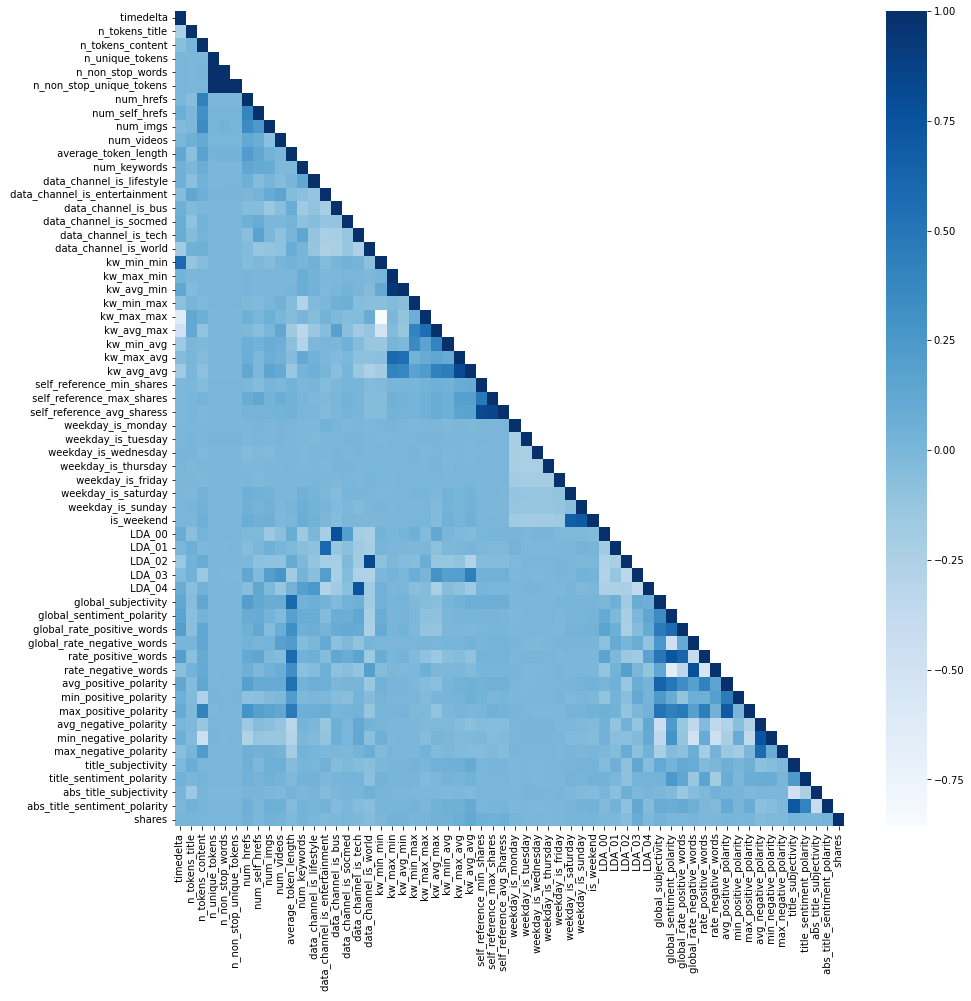

In [9]:
cor=data.corr()
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [10]:
cor.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


In [11]:
most = cor[abs(cor) > .75].dropna(thresh=2,axis = 0)
most

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_unique_tokens,NaN,NaN,NaN,1.000000,0.999572,0.999852,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_non_stop_words,NaN,NaN,NaN,0.999572,1.000000,0.999532,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_non_stop_unique_tokens,NaN,NaN,NaN,0.999852,0.999532,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_channel_is_bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_channel_is_world,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_min_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_max_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_avg_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_max_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_max_avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
deleteColumns = most.index

In [13]:
newData = data.drop(columns=deleteColumns)
newData.head(10)

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731.0,10.0,370.0,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731.0,8.0,960.0,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731.0,12.0,989.0,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,731.0,11.0,97.0,2.0,0.0,0.0,0.0,4.855670,7.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,731.0,10.0,231.0,4.0,1.0,1.0,1.0,5.090909,5.0,0.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


/var/folders/nb/s2fx_kf54nv8fpngr1jppkjh0000gn/T/ipykernel_8342/132436370.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot:>

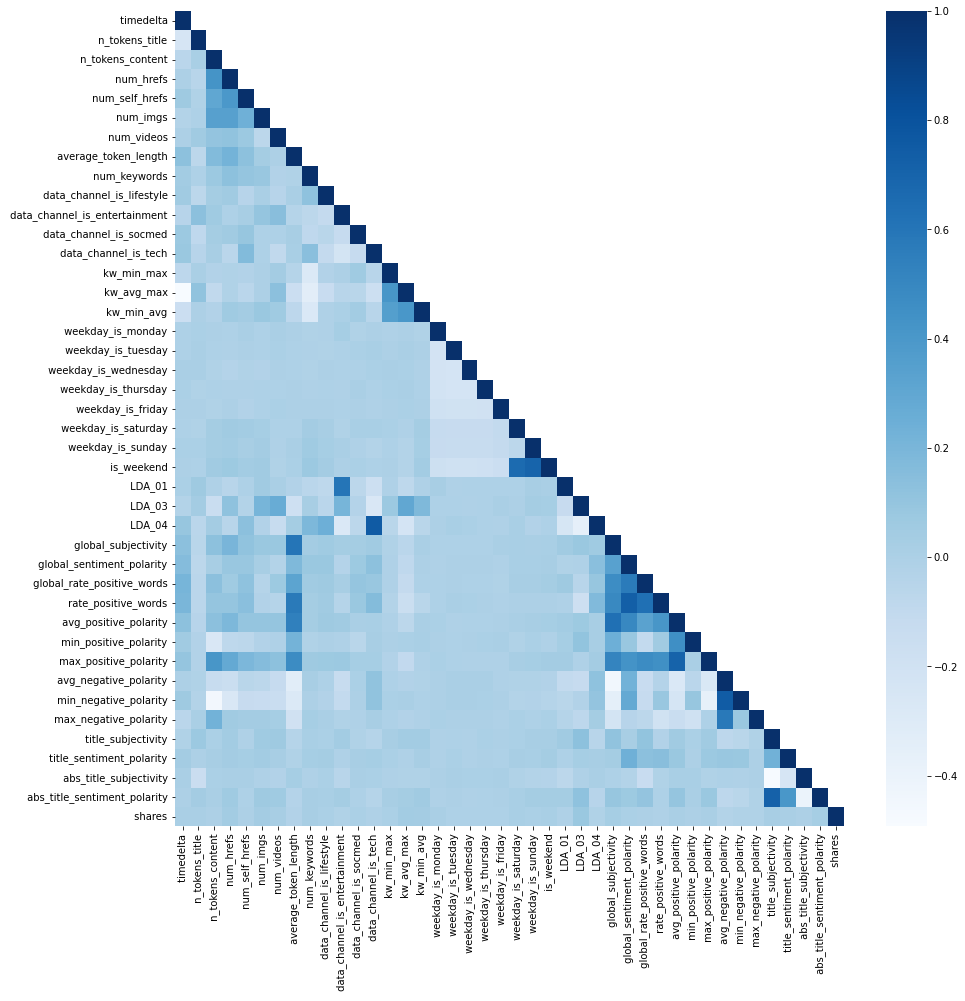

In [14]:
cor=newData.corr()
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [15]:
cor.describe()

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.034100,0.008213,0.064774,0.081476,0.076387,0.064913,0.043636,0.075931,0.030468,0.030222,...,0.036202,0.122271,0.004548,-0.005477,0.019147,0.050758,0.063944,-0.015323,0.060611,0.031327
std,0.191452,0.169271,0.214234,0.197154,0.177856,0.176596,0.169946,0.249988,0.183703,0.166917,...,0.187046,0.250089,0.250588,0.244386,0.196936,0.208690,0.174384,0.191363,0.208327,0.154685
min,-0.493093,-0.240320,-0.450603,-0.263576,-0.122071,-0.136522,-0.138190,-0.324529,-0.332221,-0.132091,...,-0.261493,-0.360871,-0.443187,-0.450603,-0.223191,-0.487172,-0.240112,-0.487172,-0.400272,-0.032029
25%,-0.006042,-0.052527,-0.009142,-0.012255,-0.013652,-0.008550,-0.015685,-0.033217,-0.015470,-0.022059,...,-0.015079,-0.009659,-0.096128,-0.094370,-0.022054,-0.011136,-0.000293,-0.021473,-0.004177,-0.006927
50%,0.004325,-0.007468,0.024383,0.047937,0.032688,0.025026,0.008097,0.002589,0.023130,0.006346,...,0.002526,0.039379,-0.019732,-0.014914,-0.002713,0.018990,0.025068,-0.008552,0.022358,0.005426
75%,0.073348,0.010899,0.102514,0.111304,0.111358,0.076177,0.069474,0.129568,0.061534,0.047530,...,0.023987,0.147839,0.007780,0.014018,0.020879,0.052683,0.044493,0.008738,0.056202,0.020603
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# most correlation with shares

In [16]:
mostSharesCorrelation = cor[abs(cor[' shares']) >= .02]
mostSharesCorrelation

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
num_hrefs,-0.000832,-0.053496,0.423065,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,0.052906,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_imgs,-0.027636,-0.008858,0.342600,0.342633,0.238586,1.000000,-0.067336,0.033924,0.088432,0.010260,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,0.114518,0.077458,-0.067336,1.000000,-0.002940,-0.022257,-0.044602,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
average_token_length,0.130465,-0.071403,0.167789,0.222588,0.126879,0.033924,-0.002940,1.000000,-0.016814,0.011161,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007
num_keywords,0.046884,-0.006077,0.072845,0.125890,0.099578,0.088432,-0.022257,-0.016814,1.000000,0.124578,...,-0.015890,0.062440,0.021114,-0.002656,0.028036,0.016014,0.031705,-0.010992,0.023533,0.021818
kw_avg_max,-0.493093,0.115746,-0.096460,-0.019269,-0.064747,0.002217,0.136228,-0.157419,-0.332221,-0.132091,...,0.006972,-0.097967,-0.021485,0.014258,-0.022972,0.047235,-0.010713,-0.015096,0.035188,0.044686
kw_min_avg,-0.157204,-0.002370,-0.022286,0.058920,0.039239,0.081029,0.058866,-0.076706,-0.272042,-0.010045,...,0.015884,-0.012181,-0.020031,-0.004458,-0.009388,0.045342,0.024973,-0.016834,0.054769,0.039551
LDA_03,-0.030838,0.042208,-0.140141,0.123786,-0.028775,0.208924,0.267673,-0.181714,0.022726,-0.063131,...,0.108755,-0.014059,-0.114381,-0.025578,-0.074780,0.129062,0.027687,-0.013784,0.122120,0.083771
global_subjectivity,0.133837,-0.056804,0.127879,0.203464,0.115285,0.080468,0.082052,0.597629,0.038603,0.060423,...,0.243984,0.518773,-0.443187,-0.350070,-0.223191,0.114123,0.034075,-0.003758,0.091067,0.031604
avg_negative_polarity,-0.000507,-0.017096,-0.130375,-0.152146,-0.058222,-0.072500,-0.115976,-0.324529,0.021114,-0.006529,...,-0.063571,-0.268784,1.000000,0.748896,0.580108,-0.075814,0.085878,-0.006573,-0.075594,-0.032029


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


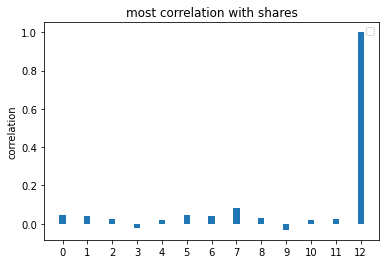

<Figure size 1440x2160 with 0 Axes>

In [17]:
x = np.arange(len(mostSharesCorrelation[' shares']))
width = .25
fig, ax = plt.subplots()
ax.bar(x,mostSharesCorrelation[' shares'],width)
labels = mostSharesCorrelation[' shares'].index
ax.set_ylabel('correlation')
ax.set_title("most correlation with shares")
ax.set_xticks(x)
ax.legend()
plt.figure(figsize=(20,30))
plt.show()

# Set New Data

In [18]:
data = newData
data.head()

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# find outlier records 

### IQR

In [69]:
for column in data.columns:    
    q1 = data[column].quantile(0.25)    # First Quartile
    q3 = data[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    df = data[(data[column] > llimit) & (data[column] < ulimit)]
    
df

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


### z-test

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' shares', ylabel='Density'>

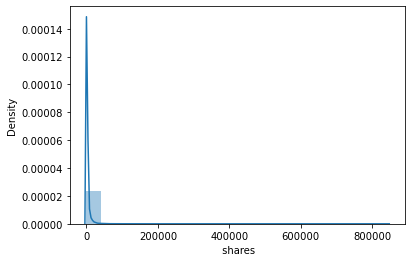

In [23]:
sns.distplot(data[' shares'], bins=20)

In [52]:
def edit(x):
    return np.log(x) + 1

temp = data.apply(edit)
temp

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,7.594413,3.484907,6.389072,2.386294,1.693147,1.000000,-inf,2.543376,2.609438,-inf,...,-1.302585,0.643325,NaN,NaN,NaN,0.306853,NaN,-inf,-0.673976,7.385194
1,7.594413,3.197225,6.541264,2.098612,1.000000,1.000000,-inf,2.592032,2.386294,-inf,...,-2.401197,0.643325,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,7.566672
2,7.594413,3.197225,6.351858,2.098612,1.000000,1.000000,-inf,2.480095,2.791759,-inf,...,-1.302585,1.000000,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,8.313220
3,7.594413,3.197225,7.274762,3.197225,-inf,1.000000,-inf,2.482717,2.945910,-inf,...,-0.992430,0.776856,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,8.090077
4,7.594413,3.564949,7.977281,3.944439,3.944439,3.995732,-inf,2.543904,2.945910,-inf,...,-2.401197,1.000000,NaN,NaN,NaN,0.211543,-0.992430,-2.091042,-0.992430,7.224558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,3.079442,3.397895,6.846439,3.197225,2.945910,1.000000,1.000000,2.509202,3.079442,-inf,...,-1.302585,0.712318,NaN,NaN,NaN,-1.302585,-inf,0.083709,-inf,8.495542
39640,3.079442,3.484907,6.793014,3.197225,2.945910,2.098612,4.871201,2.482851,2.945910,-inf,...,-0.992430,0.643325,NaN,NaN,NaN,-0.203973,1.000000,-0.609438,1.000000,8.549609
39641,3.079442,3.302585,7.091310,4.178054,1.000000,3.484907,1.000000,2.624705,3.079442,-inf,...,-0.992430,0.306853,NaN,NaN,NaN,0.211543,-0.992430,-2.091042,-0.992430,8.549609
39642,3.079442,2.791759,7.525030,3.302585,1.000000,1.000000,-inf,2.604440,2.609438,-inf,...,-1.772589,0.306853,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,8.003065


/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' shares', ylabel='Density'>

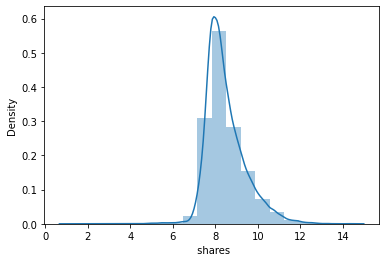

In [53]:
sns.distplot(temp[' shares'], bins=20)

In [67]:
for column in temp.columns:    
    temp[column] = (temp[coulmn] - temp[coulmn].mean())/temp[coulmn].var()
    outliers = temp[(temp[column] < 3) | (temp[column] > -3)]
    
outliers

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
176,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,...,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179,-0.514179
270,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,...,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847,-0.179847
324,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,...,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870,-0.635870
349,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,...,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915,-0.320915
410,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,...,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678,-0.119678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39324,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,...,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073,-0.645073
39476,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,...,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068,-0.273068
39500,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,...,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681,-0.617681
39537,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,...,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818,0.033818


In [68]:
outliers.shape

(637, 42)

### Percentile

In [72]:
for column in data.columns:    
    
    lower_limit, upper_limit = np.percentile(a=data[column],q=[10,90])

    tempData = data[(data[column] > lower_limit) & (data[column] < upper_limit)]
    
tempData

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
1,731.0,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
5,731.0,10.0,370.0,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,...,0.136364,0.60,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
7,731.0,12.0,989.0,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,...,0.100000,1.00,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [76]:
tempData.describe()

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,...,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000
mean,350.595720,10.393375,552.650811,10.807042,3.347577,4.449983,1.191473,4.558161,7.217927,0.052973,...,0.094625,0.757088,-0.257752,-0.519450,-0.106928,0.278055,0.071302,0.342279,0.153303,1880.428332
std,214.534866,2.111217,471.258972,11.054421,3.874675,8.148525,3.949216,0.814563,1.912810,0.223982,...,0.070305,0.245237,0.125964,0.289227,0.093712,0.321917,0.261662,0.189012,0.223716,1194.931275
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,709.000000
25%,163.000000,9.000000,251.000000,4.000000,1.000000,1.000000,0.000000,4.478735,6.000000,0.000000,...,0.050000,0.600000,-0.325580,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,1000.000000
50%,329.000000,10.000000,416.000000,8.000000,3.000000,1.000000,0.000000,4.664671,7.000000,0.000000,...,0.100000,0.800000,-0.251042,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,540.000000,12.000000,722.000000,13.000000,4.000000,4.000000,1.000000,4.855182,9.000000,0.000000,...,0.100000,1.000000,-0.185550,-0.300000,-0.050000,0.500000,0.136894,0.500000,0.250000,2300.000000
max,731.000000,20.000000,7764.000000,187.000000,116.000000,128.000000,75.000000,8.041534,10.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,6100.000000


# Set New Data

In [105]:
data = tempData
Columns = data.columns
data

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
1,731.0,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
5,731.0,10.0,370.0,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,...,0.136364,0.60,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
7,731.0,12.0,989.0,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,...,0.100000,1.00,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# Scaling

### Quantile Transformer

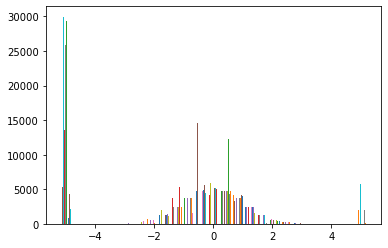

In [89]:
quantile = QuantileTransformer(output_distribution='normal')
qtdata = quantile.fit_transform(data)
plt.hist(qtdata, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


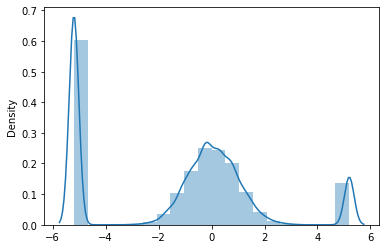

In [90]:
sns.distplot(qtdata, bins=20);

### power transformer 

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


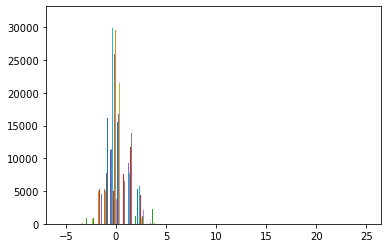

In [115]:
pt = PowerTransformer()
pdata = pt.fit_transform(data)
plt.hist(pdata, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


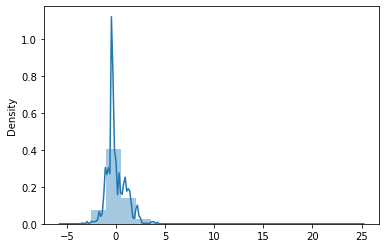

In [116]:
sns.distplot(pdata, bins=20);

### min-max-transformer

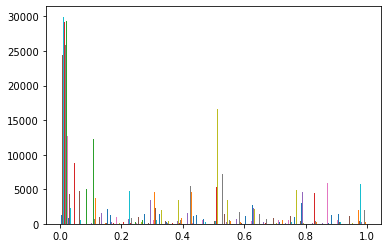

In [97]:
min_max = MinMaxScaler()
min_max_data = min_max.fit_transform(data)
plt.hist(min_max_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


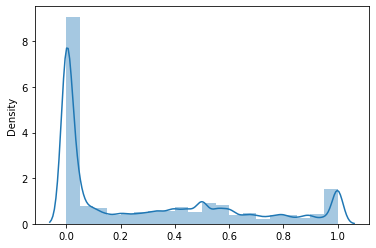

In [98]:
sns.distplot(min_max_data, bins=20);

### RobustScaler

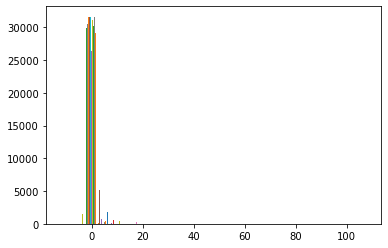

In [99]:
r_scaler = RobustScaler()
r_data = r_scaler.fit_transform(data)
plt.hist(r_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


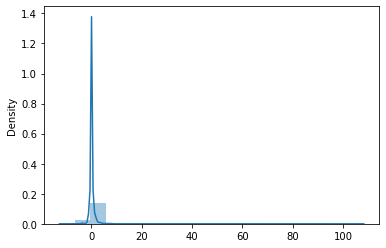

In [100]:
sns.distplot(r_data, bins=20);

# Set New Data

In [118]:
data = pd.DataFrame(r_data ,columns=Columns)
data

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.066313,-0.333333,-0.341826,-0.555556,-0.666667,0.000000,0.0,0.661594,-1.000000,0.0,...,-1.333333,-0.250,0.944737,0.9375,0.000000,-0.250000,0.000000,0.000000,0.000000,-0.530000
1,1.066313,-0.333333,-0.435244,-0.555556,-0.666667,0.000000,0.0,-0.720702,-0.333333,0.0,...,0.000000,0.500,-1.539847,-0.7500,-0.444444,-0.250000,0.000000,0.000000,0.000000,0.076923
2,1.066313,-0.333333,0.244161,0.111111,-1.000000,0.000000,0.0,-0.690069,0.000000,0.0,...,0.727273,0.000,-0.847355,-0.2500,-0.888889,-0.250000,0.000000,0.000000,0.000000,-0.153846
3,1.066313,0.000000,-0.097665,-0.666667,-0.333333,-0.333333,0.0,-0.810769,0.666667,0.0,...,0.727273,-0.500,0.400211,0.2500,0.000000,1.035714,1.565341,-1.071429,0.857143,-0.419231
4,1.066313,0.666667,1.216561,1.333333,5.666667,6.333333,0.0,-0.124519,0.666667,0.0,...,0.000000,0.500,0.059015,0.0000,0.666667,1.750000,3.652463,0.000000,2.000000,-0.391538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,-0.851459,0.333333,-0.148620,0.111111,1.333333,0.000000,1.0,-0.376014,0.333333,0.0,...,0.000000,-0.125,-0.063974,0.0000,-0.333333,-0.050000,0.000000,-0.300000,0.000000,0.307692
31635,-0.851459,0.666667,-0.186837,0.111111,1.333333,0.666667,48.0,-0.688498,0.000000,0.0,...,0.727273,-0.250,0.285157,0.2500,0.000000,0.350000,7.304925,-0.900000,4.000000,0.384615
31636,-0.851459,0.000000,0.055202,1.777778,-0.666667,3.666667,1.0,1.095115,0.333333,0.0,...,0.727273,-0.750,-0.752679,-0.7500,-0.888889,0.659091,0.996126,-1.363636,0.545455,0.384615
31637,-0.851459,-1.333333,0.564756,0.222222,-0.666667,0.000000,0.0,0.824560,-0.666667,0.0,...,-0.750000,-0.750,0.327045,0.0000,1.166667,-0.250000,0.000000,0.000000,0.000000,-0.230769


In [113]:
data.shape

(31639, 42)

In [112]:
data

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.542052,-0.644024,-0.604180,-0.977082,-0.766802,-0.297551,-0.737281,0.693939,-1.653269,-0.236507,...,-1.213731,-0.428102,1.129594,1.394511,-0.191789,-0.981814,-0.244162,0.882208,-0.879973,0.0
1,1.542052,-0.644024,-0.777263,-0.977082,-0.766802,-0.297551,-0.737281,-0.701914,-0.650362,-0.236507,...,0.356049,1.116821,-1.590950,-0.970748,-0.661316,-0.981814,-0.244162,0.882208,-0.879973,0.0
2,1.542052,-0.644024,0.197091,0.154607,-1.793746,-0.297551,-0.737281,-0.675600,-0.131949,-0.236507,...,0.922930,0.018794,-0.908347,-0.308235,-1.036354,-0.981814,-0.244162,0.882208,-0.879973,0.0
3,1.542052,-0.160911,-0.225424,-1.318460,-0.174001,-1.560893,-0.737281,-0.778170,0.932837,-0.236507,...,0.922930,-0.814168,0.462606,0.383755,-0.191789,1.205639,0.570136,-1.161655,0.859737,0.0
4,1.542052,0.770687,1.074915,1.122618,2.591564,1.678959,-0.737281,-0.153795,0.932837,-0.236507,...,0.356049,1.116821,0.067423,0.033753,0.753040,1.626643,1.593175,0.882208,1.546700,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,-2.128014,0.310239,-0.297679,0.154607,1.236218,-0.297551,1.100277,-0.394428,0.396092,-0.236507,...,0.356049,-0.212592,-0.071066,0.033753,-0.553745,-0.380085,-0.244162,0.104232,-0.879973,0.0
31635,-2.128014,0.770687,-0.353936,0.154607,1.236218,0.565618,1.935890,-0.674245,-0.131949,-0.236507,...,0.922930,-0.428102,0.327491,0.383755,-0.191789,0.435209,3.256110,-0.955057,1.823541,0.0
31636,-2.128014,-0.160911,-0.024703,1.357082,-0.766802,1.453263,1.100277,1.228440,0.396092,-0.236507,...,0.922930,-1.144647,-0.811032,-0.970748,-1.036354,0.849566,0.279314,-1.437929,0.443799,0.0
31637,-2.128014,-2.182830,0.525665,0.276313,-0.766802,-0.297551,-0.737281,0.888998,-1.157979,-0.236507,...,-0.423104,-1.144647,0.376459,0.033753,1.723935,-0.981814,-0.244162,0.882208,-0.879973,0.0


In [119]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,...,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000,31639.000000
mean,0.057283,0.131125,0.290129,0.311894,0.115859,1.149994,1.191473,-0.282935,0.072642,0.052973,...,-0.107505,-0.107281,-0.047923,-0.048626,-0.092376,0.306109,0.520852,-0.473163,0.613211,0.369560
std,0.569058,0.703739,1.000550,1.228269,1.291558,2.716175,3.949216,2.163821,0.637603,0.223982,...,1.406110,0.613093,0.899547,0.723067,1.249487,0.643835,1.911423,0.567036,0.894863,0.919178
min,-0.851459,-2.666667,-0.883227,-0.888889,-1.000000,-0.333333,0.000000,-12.391323,-2.000000,0.000000,...,-2.000000,-2.000000,-5.348551,-1.250000,-12.000000,-0.250000,-7.304925,-1.500000,0.000000,-0.531538
25%,-0.440318,-0.333333,-0.350318,-0.444444,-0.666667,0.000000,0.000000,-0.493922,-0.333333,0.000000,...,-1.000000,-0.500000,-0.532302,-0.500000,-0.333333,-0.250000,0.000000,-1.000000,0.000000,-0.307692
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.559682,0.666667,0.649682,0.555556,0.333333,1.000000,1.000000,0.506078,0.666667,0.000000,...,0.000000,0.500000,0.467698,0.500000,0.666667,0.750000,1.000000,0.000000,1.000000,0.692308
max,1.066313,3.333333,15.600849,19.888889,37.666667,42.333333,75.000000,8.970365,1.000000,1.000000,...,18.000000,0.500000,1.792769,1.250000,1.333333,1.750000,7.304925,0.000000,4.000000,3.615385


# Train Linear Model

In [120]:
X = data.drop(columns=[" shares"])
y = data[" shares"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
linearModel = LinearRegression()
linearModel.fit(X_train ,y_train)

LinearRegression()

In [125]:
Y_pred = linearModel.predict(X_test)

In [127]:
mean_squared_error(y_test,Y_pred)

0.8121524923551318

In [128]:
sqrt(mean_squared_error(Y_test,Y_pred))

NameError: name 'sqrt' is not defined